# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import  metrics
import pickle

# Description of the data

Attribute Information:
    
Listing of attributes: >50K, <=50K.
    
age: continuous.
    
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
    
Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.
    
education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
    
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,

Doctorate, 5th-6th, Preschool.

education-num: continuous.
    
marital-status: Married-civ-spouse, Divorced, Never-married,
    
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-
    
managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,

Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,

Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-
    
relative,

Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    
sex: Female, Male.

capital-gain: continuous.
    
capital-loss: continuous.
    
hours-per-week: continuous.
    
native-country: United-States, Cambodia, England, Puerto-Rico,
    
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,

Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,

Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,

Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,

Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,

El-

Salvador, Trinadad&amp;Tobago, Peru, Hong, Holand-Netherlands.

# Import train and test data

In [2]:
train_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [3]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

In [5]:
test_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [7]:
train_set.columns = col_labels
test_set.columns = col_labels

In [8]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [10]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [11]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [12]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

# Data Visualization

Text(0.5, 0, 'wage_class')

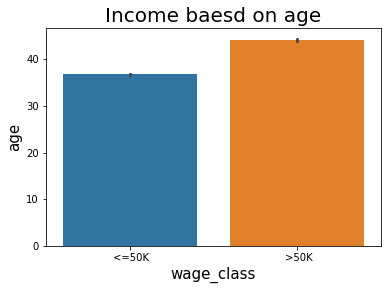

In [13]:
sns.barplot(y="age",x="wage_class",data=train_set)
plt.title("Income baesd on age",fontsize=20)
plt.ylabel("age",fontsize=15)
plt.xlabel("wage_class",fontsize=15)

Text(0, 0.5, 'workclass')

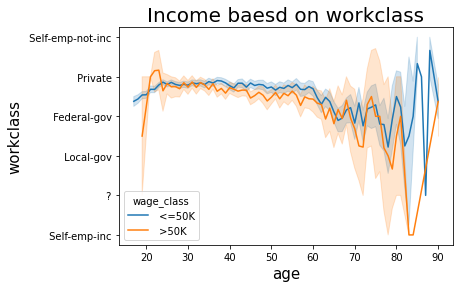

In [14]:
sns.lineplot(x="age",y='workclass',hue="wage_class",data=train_set)
plt.title("Income baesd on workclass",fontsize=20)
plt.xlabel("age",fontsize=15)
plt.ylabel("workclass",fontsize=15)

<AxesSubplot:xlabel='capital_loss', ylabel='education'>

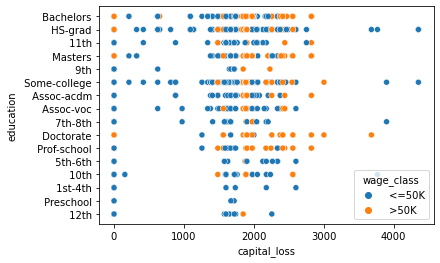

In [15]:
sns.scatterplot(x='capital_loss', y='education', hue='wage_class', data=train_set)

# Lable Encoding

In [17]:
train_set["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [351]:
#train_set['workclass'] = train_set['workclass'].replace(to_replace='?',value='None')

In [16]:
train_set["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [17]:
label_encoder = preprocessing.LabelEncoder()
train_set['workclass'] = label_encoder.fit_transform(train_set['workclass'])

In [18]:
train_set["workclass"].value_counts()

4    22696
6     2541
2     2093
0     1836
7     1298
5     1116
1      960
8       14
3        7
Name: workclass, dtype: int64

In [19]:
test_set['workclass'].value_counts()

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64

In [20]:
label_encoder = preprocessing.LabelEncoder()
test_set['workclass'] = label_encoder.fit_transform(test_set['workclass'])

In [21]:
test_set['workclass'].value_counts()

4    11210
6     1321
2     1043
0      963
7      683
5      579
1      472
8        7
3        3
Name: workclass, dtype: int64

In [22]:
train_set['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [23]:
test_set['education'].value_counts()

 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: education, dtype: int64

In [24]:
label_encoder = preprocessing.LabelEncoder()
train_set['education'] = label_encoder.fit_transform(train_set['education'])
label_encoder = preprocessing.LabelEncoder()
test_set['education'] = label_encoder.fit_transform(test_set['education'])

In [25]:
train_set['education'].value_counts()

11    10501
15     7291
9      5355
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: education, dtype: int64

In [26]:
test_set['education'].value_counts()

11    5283
15    3587
9     2670
12     934
8      679
1      637
7      534
0      456
5      309
14     258
6      242
2      224
10     181
4      176
3       79
13      32
Name: education, dtype: int64

In [27]:
train_set['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [28]:
test_set['marital_status'].value_counts()

 Married-civ-spouse       7403
 Never-married            5434
 Divorced                 2190
 Widowed                   525
 Separated                 505
 Married-spouse-absent     210
 Married-AF-spouse          14
Name: marital_status, dtype: int64

In [29]:
label_encoder = preprocessing.LabelEncoder()
train_set['marital_status'] = label_encoder.fit_transform(train_set['marital_status'])
label_encoder = preprocessing.LabelEncoder()
test_set['marital_status'] = label_encoder.fit_transform(test_set['marital_status'])

In [30]:
train_set['marital_status'].value_counts()

2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: marital_status, dtype: int64

In [31]:
test_set['marital_status'].value_counts()

2    7403
4    5434
0    2190
6     525
5     505
3     210
1      14
Name: marital_status, dtype: int64

In [32]:
train_set['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [33]:
test_set['occupation'].value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: occupation, dtype: int64

In [34]:
label_encoder = preprocessing.LabelEncoder()
train_set['occupation'] = label_encoder.fit_transform(train_set['occupation'])
label_encoder = preprocessing.LabelEncoder()
test_set['occupation'] = label_encoder.fit_transform(test_set['occupation'])

In [35]:
train_set['occupation'].value_counts()

10    4140
3     4099
4     4066
1     3770
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: occupation, dtype: int64

In [36]:
test_set['occupation'].value_counts()

10    2032
4     2020
3     2013
12    1854
1     1841
8     1628
7     1020
0      966
14     758
6      702
13     518
5      496
11     334
9       93
2        6
Name: occupation, dtype: int64

In [37]:
train_set['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [38]:
test_set['relationship'].value_counts()

 Husband           6523
 Not-in-family     4278
 Own-child         2513
 Unmarried         1679
 Wife               763
 Other-relative     525
Name: relationship, dtype: int64

In [39]:
label_encoder = preprocessing.LabelEncoder()
train_set['relationship'] = label_encoder.fit_transform(train_set['relationship'])
label_encoder = preprocessing.LabelEncoder()
test_set['relationship'] = label_encoder.fit_transform(test_set['relationship'])

In [40]:
train_set['relationship'].value_counts()

0    13193
1     8305
3     5068
4     3446
5     1568
2      981
Name: relationship, dtype: int64

In [41]:
test_set['relationship'].value_counts()

0    6523
1    4278
3    2513
4    1679
5     763
2     525
Name: relationship, dtype: int64

In [42]:
train_set['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [44]:
test_set['race'].value_counts()

 White                 13946
 Black                  1561
 Asian-Pac-Islander      480
 Amer-Indian-Eskimo      159
 Other                   135
Name: race, dtype: int64

In [45]:
label_encoder = preprocessing.LabelEncoder()
train_set['race'] = label_encoder.fit_transform(train_set['race'])
label_encoder = preprocessing.LabelEncoder()
test_set['race'] = label_encoder.fit_transform(test_set['race'])

In [46]:
train_set['race'].value_counts()

4    27816
2     3124
1     1039
0      311
3      271
Name: race, dtype: int64

In [47]:
test_set['race'].value_counts()

4    13946
2     1561
1      480
0      159
3      135
Name: race, dtype: int64

In [48]:
train_set['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [49]:
test_set['sex'].value_counts()

 Male      10860
 Female     5421
Name: sex, dtype: int64

In [50]:
label_encoder = preprocessing.LabelEncoder()
train_set['sex'] = label_encoder.fit_transform(train_set['sex'])
label_encoder = preprocessing.LabelEncoder()
test_set['sex'] = label_encoder.fit_transform(test_set['sex'])

In [51]:
train_set['sex'].value_counts()

1    21790
0    10771
Name: sex, dtype: int64

In [52]:
test_set['sex'].value_counts()

1    10860
0     5421
Name: sex, dtype: int64

In [53]:
train_set['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [54]:
test_set['native_country'].value_counts()

 United-States                 14662
 Mexico                          308
 ?                               274
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                          37
 South                            35
 Dominican-Republic               33
 Italy                            32
 Haiti                            31
 Portugal                         30
 Japan                            30
 Poland                           27
 Columbia                         26
 Jamaica                          25
 Guatemala                        24
 Greece                           20
 Vietnam                          19
 Ecuador                          17
 Iran                             16
 Peru                             15
 

In [55]:
label_encoder = preprocessing.LabelEncoder()
train_set['native_country'] = label_encoder.fit_transform(train_set['native_country'])
label_encoder = preprocessing.LabelEncoder()
test_set['native_country'] = label_encoder.fit_transform(test_set['native_country'])

In [56]:
train_set['native_country'].value_counts()

39    29170
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
10       29
12       29
7        28
21       24
17       20
1        19
38       19
25       18
37       18
41       16
28       14
16       13
18       13
34       12
15        1
Name: native_country, dtype: int64

In [57]:
test_set['native_country'].value_counts()

38    14662
25      308
0       274
29       97
32       70
11       69
2        61
18       51
8        49
3        47
5        43
9        37
34       35
6        33
21       32
14       31
31       30
23       30
30       27
4        26
22       25
13       24
12       20
39       19
7        17
19       16
28       15
26       15
35       14
20       13
36       12
16       10
27        9
10        9
33        9
1         9
37        8
40        7
15        7
17        6
24        5
Name: native_country, dtype: int64

In [58]:
train_set.drop("fnlwgt",axis=1,inplace=True)

In [59]:
train_set['wage_class'].value_counts()

 <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64

In [60]:
test_set['wage_class'].value_counts()

 <=50K.    12435
 >50K.      3846
Name: wage_class, dtype: int64

In [61]:
label_encoder = preprocessing.LabelEncoder()
train_set['wage_class'] = label_encoder.fit_transform(train_set['wage_class'])
label_encoder = preprocessing.LabelEncoder()
test_set['wage_class'] = label_encoder.fit_transform(test_set['wage_class'])

In [62]:
train_set['wage_class'].value_counts()

0    24720
1     7841
Name: wage_class, dtype: int64

In [63]:
test_set['wage_class'].value_counts()

0    12435
1     3846
Name: wage_class, dtype: int64

In [65]:
train_set["wage_class"].value_counts()

0    24720
1     7841
Name: wage_class, dtype: int64

In [66]:
y =train_set['wage_class']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: wage_class, Length: 32561, dtype: int32

In [67]:
test_set.drop("fnlwgt",axis=1,inplace=True)

In [68]:
new_train = train_set.drop("wage_class",axis=1)
new_train

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,7,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,9,13,2,4,0,4,1,0,0,13,39
2,38,4,11,9,0,6,1,4,1,0,0,40,39
3,53,4,1,7,2,6,0,2,1,0,0,40,39
4,28,4,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,11,9,4,1,3,4,1,0,0,20,39


In [69]:
new_test = test_set.drop("wage_class",axis=1)
new_test
y1 = test_set["wage_class"]

# Over Sampling using Random sampler

In [70]:
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(new_train, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 24720, 1: 24720})


In [71]:
new_test = test_set.drop("wage_class",axis=1)
new_test

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,4,1,7,4,7,3,2,1,0,0,40,38
1,38,4,11,9,2,5,0,4,1,0,0,50,38
2,28,2,7,12,2,11,0,4,1,0,0,40,38
3,44,4,15,10,2,7,0,2,1,7688,0,40,38
4,18,0,15,10,4,0,3,4,0,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,4,9,13,0,10,1,4,0,0,0,36,38
16277,64,0,11,9,6,0,2,2,1,0,0,40,38
16278,38,4,9,13,2,10,0,4,1,0,0,50,38
16279,44,4,9,13,0,1,3,1,1,5455,0,40,38


# Check Distribution of the data

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

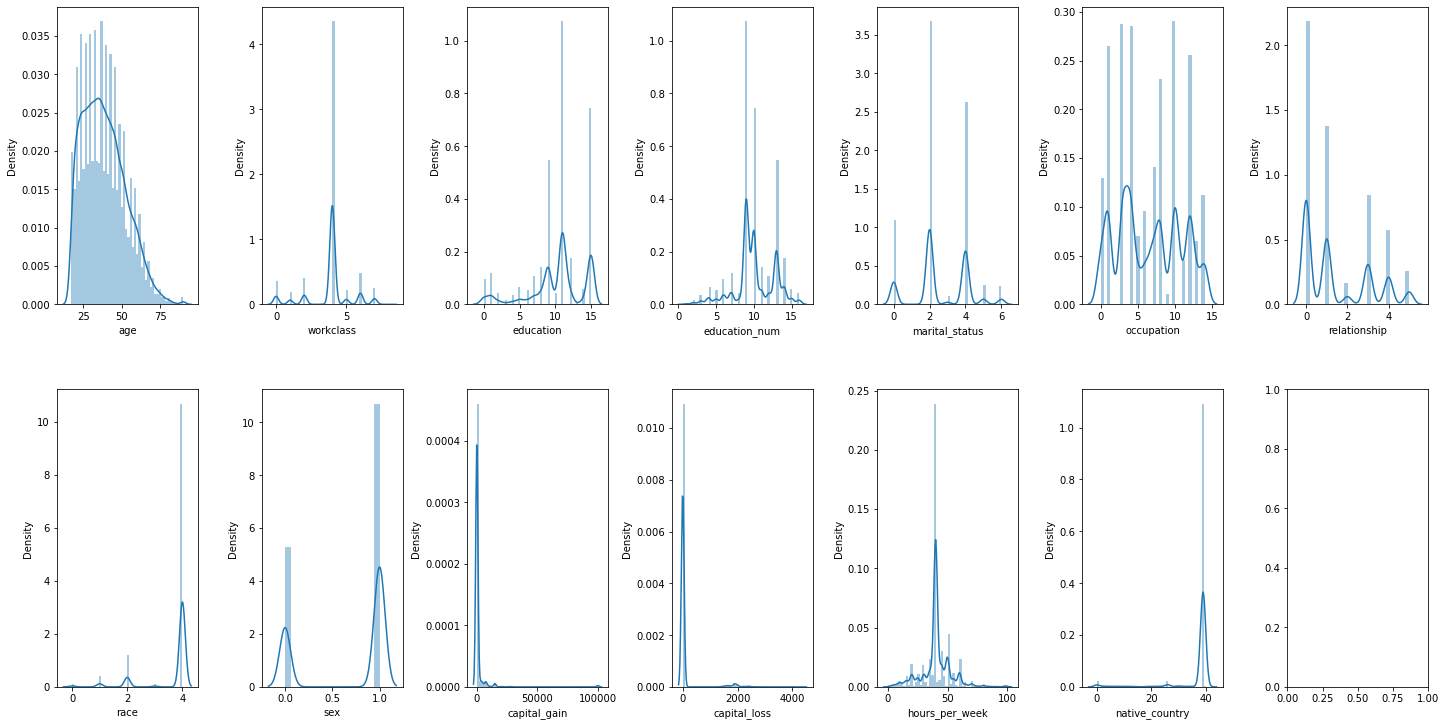

In [72]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in new_train.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [381]:
#new_train["age"] = np.log(new_train["age"])

In [419]:
#X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=42)

# Scaling the data using standard scaler

In [73]:
 #scalling
scaler = StandardScaler()
x_train = scaler.fit_transform(X_over)
x_test = scaler.transform(new_test)

# Train XGBoost Model Using Some Parameters

In [254]:
param_dict={'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.44,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 6,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
"weights":[0.90]
           }

In [255]:
xg = xgb.XGBClassifier(**param_dict,n_jobs=2)

In [256]:
xg.fit(x_train,y_over)

[22:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.44, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=6,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=2, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [257]:
y_pred = xg.predict(x_test)

In [258]:
accuracy_score(test_set['wage_class'],y_pred)

0.8359437380996253

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


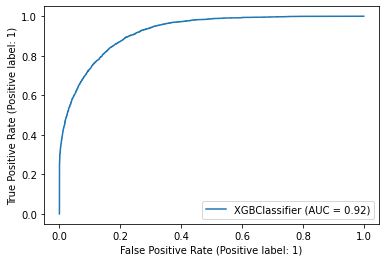

In [259]:
metrics.plot_roc_curve(xg, x_test,test_set['wage_class']) 
plt.show()

In [260]:
print(confusion_matrix(test_set['wage_class'],y_pred))
print(classification_report(test_set['wage_class'],y_pred))

[[10391  2044]
 [  627  3219]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     12435
           1       0.61      0.84      0.71      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.84      0.80     16281
weighted avg       0.86      0.84      0.84     16281



# Dump Our Model Using Pickle

In [261]:
filename = "finalisedmodel.pickle"
pickle.dump(xg,open(filename,"wb"))

In [262]:
model = pickle.load(open(filename,"rb"))

In [288]:
model.predict([[38,2,12,34,6,1,6,4,0,8,0,40,0]])

array([1])

In [289]:
test_set.head(20)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,4,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,15,10,4,0,3,4,0,0,0,30,38,0
5,34,4,0,6,4,8,1,4,1,0,0,30,38,0
6,29,0,11,9,4,0,4,2,1,0,0,40,38,0
7,63,6,14,15,2,10,0,4,1,3103,0,32,38,1
8,24,4,15,10,4,8,4,4,0,0,0,40,38,0
9,55,4,5,4,2,3,0,4,1,0,0,10,38,0


In [291]:
model.predict([[43,4,12,14,2,4,0,4,1,1,0,50,38]])

array([1])